參考資料：
1. https://morvanzhou.github.io/tutorials/machine-learning/keras/3-1-save/
- http://scikit-image.org/docs/dev/api/skimage.measure.html#skimage.measure.compare_psnr
- http://scikit-image.org/docs/dev/api/skimage.measure.html#skimage.measure.compare_ssim

In [28]:
import time

In [29]:
import numpy as np
# np.random.seed(1337)  # for reproducibility
from matplotlib import pyplot as plt

In [30]:
from skimage.measure import compare_psnr, compare_ssim

In [31]:
from keras.models import Sequential
from keras.layers import Dense
from keras.models import load_model

In [32]:
def CheckType(intVar):
    print("max:", intVar.max())
    print("min:", intVar.min())
    print("shape:", intVar.shape)
    print("type:", intVar.dtype)
    return

###### OWN func 

In [33]:
def ResultImgShow(decodeImg, strImgLabel = "TMP"):
    img0 = decodeImg[0]
    for i in range(1, 20):
        img1 = decodeImg[i]
        img0 = np.hstack((img0, img1))
    plt.imshow(img0, cmap = "gray")
#     plt.savefig(model_name.split(".")[0] +"_"+ ("TEST" if boolTest else "TRAIN")+ ".png")
    plt.savefig(model_name.split(".")[0] +"_"+ strImgLabel+ ".png")
    plt.show()
    plt.close()
    return

In [34]:
def PSNR_ALL(testData, truthData, strImgLabel = "TMP", boolTest = False):
    psnrSum_test = 0
    for i in range(testData.shape[0]):
        groundTruth   = truthData[i, :,:]
        predictResult = testData[i, :,:]
        psnrTmp = float(compare_psnr(groundTruth, predictResult))
        psnrSum_test += psnrTmp
    psnrSum_test /= testData.shape[0]
#     print("TEST" if boolTest else "TRAIN" ,"PSNR:", psnrSum_test)
    print(strImgLabel, "PSNR:", psnrSum_test)
    return psnrSum_test

In [35]:
def SSIM_ALL(testData, truthData, strImgLabel = "TMP", boolTest = False):
    ssimSum_test = 0
    for i in range(testData.shape[0]):
        groundTruth   = truthData[i, :,:]
        predictResult = testData[i, :,:]
        ssimTmp = float(compare_ssim(groundTruth, predictResult))
        ssimSum_test += ssimTmp
    ssimSum_test /= testData.shape[0]
    print(strImgLabel, "SSIM:", ssimSum_test)
    return ssimSum_test

###### START - LOAD

In [36]:
# model_name = 'model_2_e50_b128.h5'
model_name = "model_2_e50_b128_2018-12-6-20-57.h5"

In [37]:
dataSetName = "mnist-pria-awgn_snr=10.npz"
f = np.load(dataSetName)
x_train, y_train = f['x_train'], f['y_train']
x_test, y_test = f['x_test'], f['y_test']
del f

In [39]:
model = load_model(model_name)

### TEST

###### TEST DATA 

In [40]:
x_test_forPredict = x_test.reshape(10000, 784).astype('float32') / 255 -0.5
print(x_test.shape, 'test samples')
print(x_test_forPredict.shape, 'test samples')

(10000, 28, 28) test samples
(10000, 784) test samples


In [41]:
CheckType(x_test_forPredict)

max: 0.5
min: -0.5
shape: (10000, 784)
type: float32


###### TEST PREDICT

In [42]:
decodeImg_test = model.predict(x_test_forPredict)

In [43]:
CheckType(decodeImg_test)

max: 0.9709336
min: -0.9980747
shape: (10000, 784)
type: float32


In [44]:
# decodeImg_test = (decodeImg_test + 0.5) * 255
decodeImg_test = ((decodeImg_test/2)+0.5) * 255

In [45]:
CheckType(decodeImg_test)

max: 251.29404
min: 0.24547443
shape: (10000, 784)
type: float32


In [46]:
decodeImg_test = np.reshape(decodeImg_test, (decodeImg_test.shape[0], 28, 28)).astype(np.uint8)

In [47]:
CheckType(decodeImg_test)

max: 251
min: 0
shape: (10000, 28, 28)
type: uint8


###### TEST cal. PSNR

In [48]:
CheckType(x_test)
CheckType(decodeImg_test)

max: 255
min: 0
shape: (10000, 28, 28)
type: uint8
max: 251
min: 0
shape: (10000, 28, 28)
type: uint8


In [50]:
PSNR_ALL(decodeImg_test, x_test, strImgLabel = "TEST")

TEST PSNR: 18.847679090144066


18.847679090144066

### TRAIN

###### TRAIN cal. PSNR

In [51]:
x_train_forPredict = x_train.reshape(x_train.shape[0], 784).astype('float32') / 255 -0.5
decodeImg_train = model.predict(x_train_forPredict)
# decodeImg_train = (decodeImg_train + 0.5) * 255
decodeImg_train = ((decodeImg_train/2 )+0.5) * 255
decodeImg_train = np.reshape(decodeImg_train, (decodeImg_train.shape[0], 28, 28)).astype(np.uint8)

In [52]:
CheckType(x_train)
CheckType(decodeImg_train)

max: 255
min: 0
shape: (60000, 28, 28)
type: uint8
max: 252
min: 0
shape: (60000, 28, 28)
type: uint8


In [53]:
PSNR_ALL(decodeImg_train, x_train, strImgLabel = "TRAIN")

TRAIN PSNR: 19.08714323989004


19.08714323989004

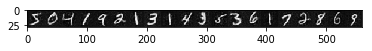

In [54]:
ResultImgShow(decodeImg_train, strImgLabel = "TRAIN")

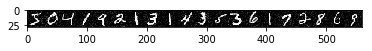

In [58]:
ResultImgShow(x_train, strImgLabel = "TRAIN_org")

### SSIM

In [55]:
SSIM_ALL(decodeImg_train, x_train, strImgLabel = "TRAIN")

TRAIN PSNR: 0.6784065724934899


0.6784065724934899

In [57]:
SSIM_ALL(decodeImg_test, x_test, strImgLabel = "TEST")

TEST PSNR: 0.6691932506460575


0.6691932506460575